# HW 2

Brian Seong

## Part 1: Basic DSP Applications in Python

1. Create a Python script that generates a sine wave with a frequency of 1000 Hz and a duration of 2 seconds. Plot the waveform using the matplotlib library.

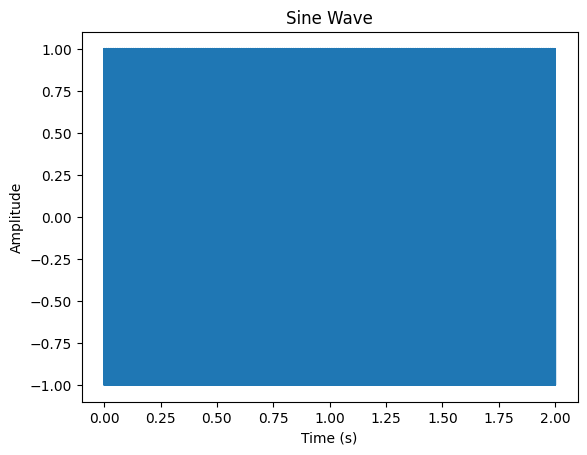

In [102]:
import numpy as np
import matplotlib.pyplot as plt

order = 2

# time samples
fs = 44100 
duration = 2  
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# sine wave
frequency = 1000
y = np.sin(2*np.pi*frequency*t)

# Plot the waveform
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()


2. Create a Python script that applies a low-pass filter to the sine wave generated in task 1. The cutoff frequency of the low-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.

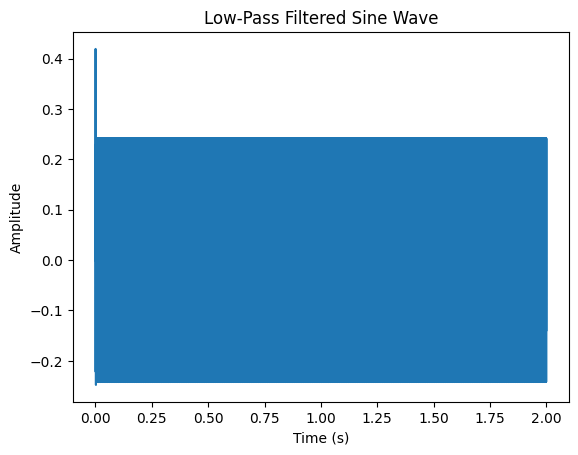

In [103]:
from scipy.signal import butter, lfilter

# low-pass filter
cutoff = 500 
nyquist = 0.5 * fs  # Nyquist frequency
normal_cutoff = cutoff / nyquist
b, a = butter(order, normal_cutoff, btype='low', analog=False)
y_filtered_low = lfilter(b, a, y)

# Plot the filtered waveform
plt.plot(t, y_filtered_low)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtered Sine Wave')
plt.show()

3. Create a Python script that applies a high-pass filter to the sine wave generated in task 1. The cutoff frequency of the high-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.

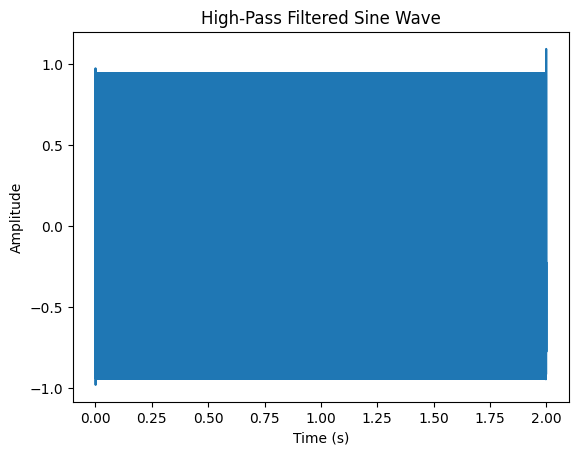

In [104]:
from scipy.signal import butter, filtfilt

# high-pass filter
cutoff = 500 
nyquist = 0.5 * fs  # Nyquist frequency
normal_cutoff = cutoff / nyquist
b, a = butter(order, normal_cutoff, btype='high', analog=False)
y_filtered_high = filtfilt(b, a, y)

# Plot the filtered waveform
plt.plot(t, y_filtered_high)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High-Pass Filtered Sine Wave')
plt.show()

4. Create a Python script that applies a band-pass filter to the sine wave generated in task 1. The cutoff frequencies of the band-pass filter should be 400 Hz and 600 Hz. Plot the filtered waveform using the matplotlib library.

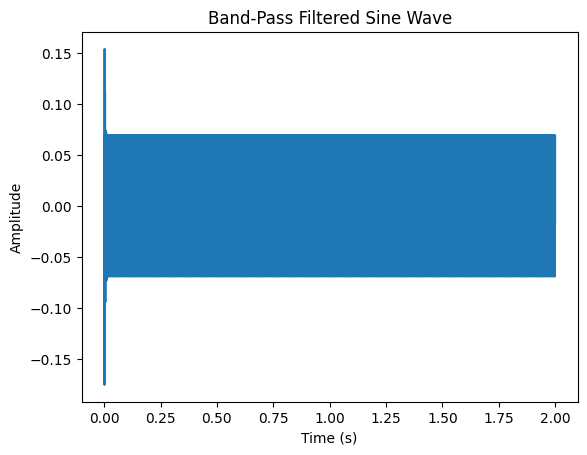

In [105]:
# band-pass filter
low_cutoff = 400 
high_cutoff = 600
nyquist = 0.5 * fs 
low = low_cutoff / nyquist
high = high_cutoff / nyquist
b, a = butter(order, [low, high], btype='band')
y_filtered_band = lfilter(b, a, y)

# Plot the filtered waveform
plt.plot(t, y_filtered_band)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Band-Pass Filtered Sine Wave')
plt.show()

5. Create a Python script that performs convolution of the sine wave generated in task 1 with a rectangular window of length 100 samples. Plot the convolved signal using the matplotlib library.

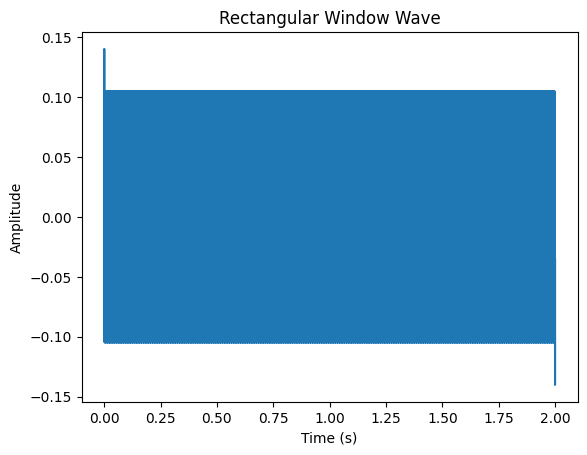

In [106]:
# rectangular window
window_length = 100
window = np.ones(window_length)

y_filtered_rect = np.convolve(y, window, mode='same') / window_length
plt.plot(t, y_filtered_rect)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Wave')
plt.show()

6. Create a Python script that performs moving average of the sine wave generated in task 1 with a window of length 10 samples. Plot the filtered signal using the matplotlib library.

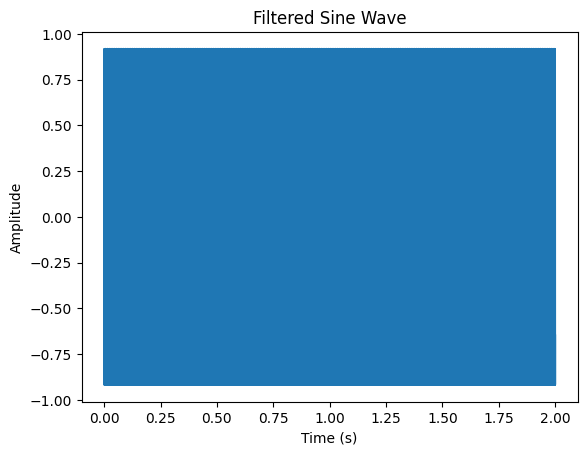

In [107]:
# moving average
window_length = 10 
y_filtered_move = np.convolve(y, np.ones(window_length) / window_length, mode='valid')

plt.plot(t[window_length-1:], y_filtered_move)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Sine Wave')
plt.show()

Compare the filtered waveforms obtained in tasks 2, 3, 4, 5 and 6 with the original waveform generated in task 1. Write a a few paragraphs in your notebook explaining the results obtained and the implications of each filter/operation type on the signal.

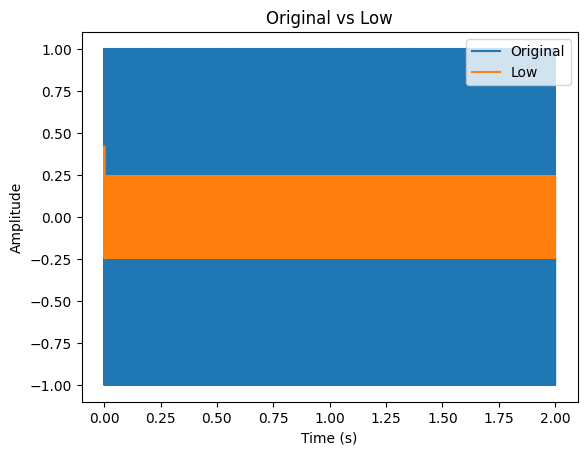

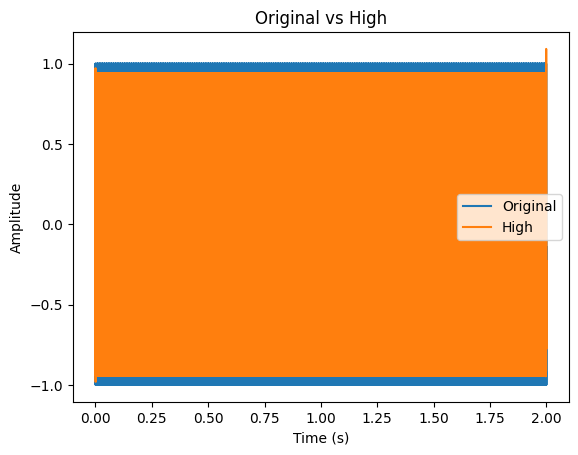

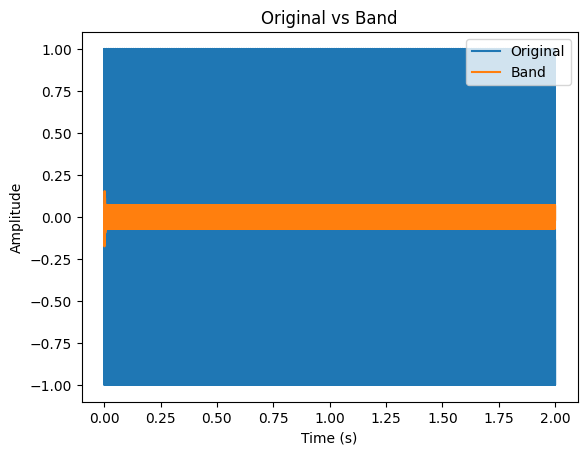

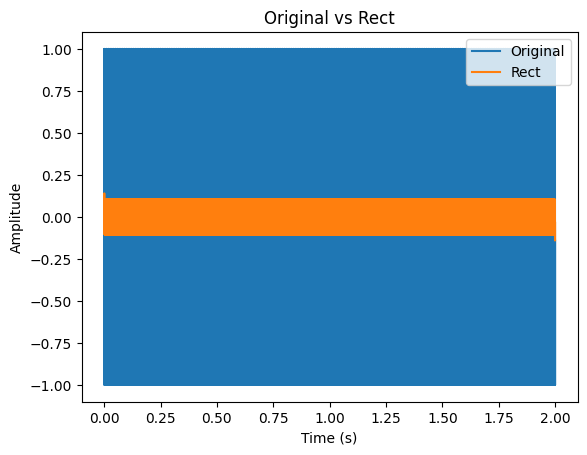

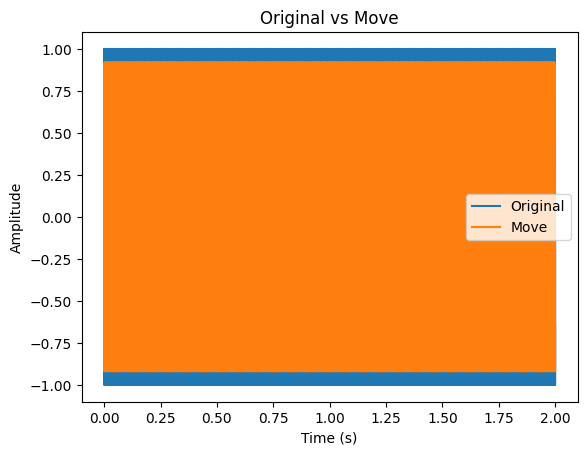

In [108]:
plt.figure(0)
plt.plot(t, y, label='Original')
plt.plot(t, y_filtered_low, label='Low')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Low')
plt.legend()

plt.figure(1)
plt.plot(t, y, label='Original')
plt.plot(t, y_filtered_high, label='High')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs High')
plt.legend()

plt.figure(2)
plt.plot(t, y, label='Original')
plt.plot(t, y_filtered_band, label='Band')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Band')
plt.legend()

plt.figure(3)
plt.plot(t, y, label='Original')
plt.plot(t, y_filtered_rect, label='Rect')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Rect')
plt.legend()

plt.figure(4)
plt.plot(t, y, label='Original')
plt.plot(t[window_length-1:], y_filtered_move, label='Move')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Move')
plt.legend()

plt.show()

- Low pass filter has helped filtered out a lot of sound from the original sound, likely that original sound had a lot of low frequency but loud sound.
- High pass filter did not filter much high frequency sounds, means original sound does not have a lot of high frequency sounds.
- Band pass filter has filtered a lot of sound, based on the previoud low and high pass result, we know that a lot of sound is filtered from below 400 Hz, and some filtering from 600 Hz above.
- Rect Window has captured very little amounts of pulse in frequency domain, that's why the amplitude left in time domain is very little.
- Moving Window seems like has smoothed out the peaks and humps in frequency domain, leaving with clearer sound than the original sound.

## Part 2: Advanced DSP Applications in Python

1. Create a Python script that generates a signal that is a sum of two sine waves with different frequencies and amplitudes. The first sine wave should have a frequency of 1000 Hz and an amplitude of 1, the second sine wave should have a frequency of 2000 Hz and an amplitude of 0.5. Plot the waveform using the matplotlib library.

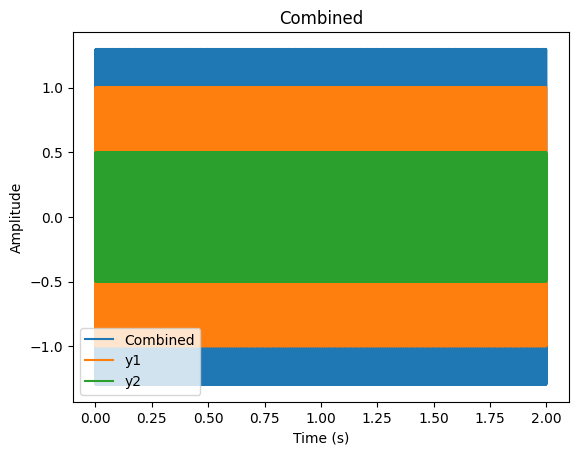

In [109]:
# time samples
fs = 44100 
duration = 2  
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# sine wave
y1 = np.sin(2*np.pi*1000*t)
y2 = 0.5 * np.sin(2*np.pi*2000*t)
y_combined = y1+ y2

plt.plot(t, y_combined, label='Combined')
plt.plot(t, y1, label='y1')
plt.plot(t, y2, label='y2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Combined')
plt.legend()

2. Create a Python script that applies a Butterworth filter to the signal generated in task 1. The cutoff frequency of the filter should be 1500 Hz and the filter order should be 4. Plot the filtered waveform using the matplotlib library.

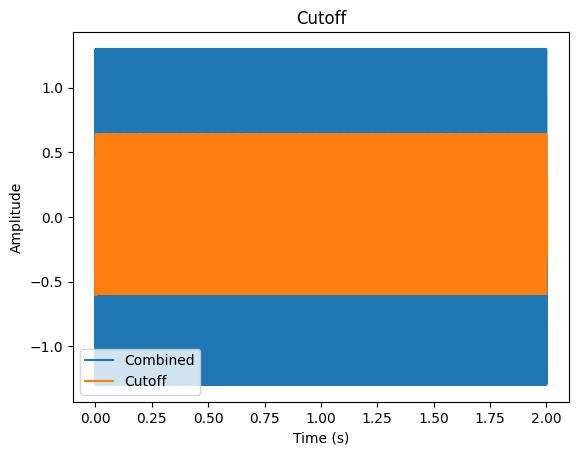

In [112]:
cutoff = 1500 
nyquist = 0.5 * fs  # Nyquist frequency
normal_cutoff = cutoff / nyquist
b, a = butter(4, normal_cutoff, btype='high', analog=False)
y_cutoff = lfilter(b, a, y_combined)

plt.plot(t, y_combined, label='Combined')
plt.plot(t, y_cutoff, label='Cutoff')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cutoff')
plt.legend()

3. Create a Python script that computes the Fast Fourier Transform (FFT) of the signal generated in task 1. Plot the magnitude and phase of the FFT using the matplotlib library.

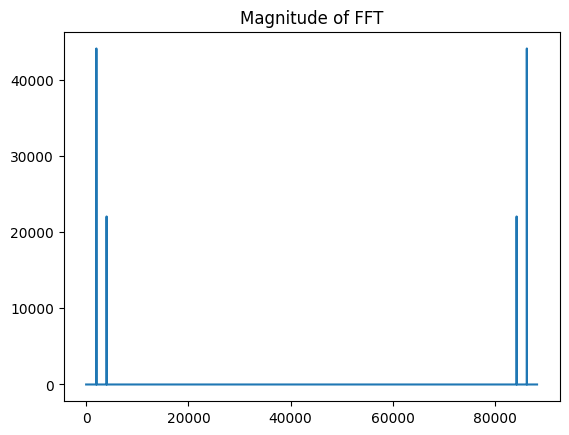

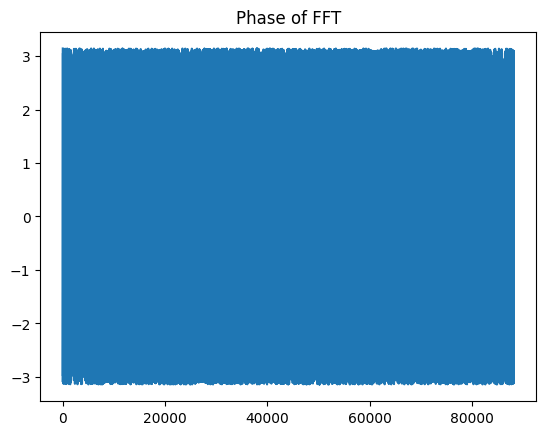

In [113]:
fft = np.fft.fft(y_combined)

# Magnitude & Plase
magnitude = np.abs(fft)
phase = np.angle(fft)

plt.figure()
plt.plot(magnitude)
plt.title("Magnitude of FFT")

plt.figure(0)
plt.plot(phase)
plt.title("Phase of FFT")

plt.show()